In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('F:\Data set\employee.csv')

In [3]:
data.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [4]:
data.shape

(100000, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Employee_ID,100000.0,50000.500000,28867.657797,1.0,25000.75,50000.5,75000.25,100000.0
Age,100000.0,41.029410,11.244121,22.0,31.00,41.0,51.00,60.0
Years_At_Company,100000.0,4.476070,2.869336,0.0,2.00,4.0,7.00,10.0
Performance_Score,100000.0,2.995430,1.414726,1.0,2.00,3.0,4.00,5.0
Monthly_Salary,100000.0,6403.211000,1372.508717,3850.0,5250.00,6500.0,7500.00,9000.0
Work_Hours_Per_Week,100000.0,44.956950,8.942003,30.0,37.00,45.0,53.00,60.0
Projects_Handled,100000.0,24.431170,14.469584,0.0,12.00,24.0,37.00,49.0
Overtime_Hours,100000.0,14.514930,8.664026,0.0,7.00,15.0,22.00,29.0
Sick_Days,100000.0,7.008550,4.331591,0.0,3.00,7.0,11.00,14.0
Remote_Work_Frequency,100000.0,50.090500,35.351157,0.0,25.00,50.0,75.00,100.0


In [7]:
data.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

In [8]:
#checking Null values
data.isnull().sum()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

In [9]:
#Checking the departments
data['Department'].value_counts()

Department
Marketing           11216
Finance             11200
Operations          11181
IT                  11131
Sales               11122
Legal               11118
Customer Support    11116
HR                  10960
Engineering         10956
Name: count, dtype: int64

In [10]:
# Droping irrelevant columns
data.drop(columns=['Hire_Date','Employee_ID'],axis=1,inplace=True)

In [11]:
data.head()

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,IT,Male,55,Specialist,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,Finance,Male,29,Developer,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,Finance,Male,55,Specialist,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,Customer Support,Female,48,Analyst,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,Engineering,Female,36,Analyst,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [12]:
data['Performance_Score'].value_counts()

Performance_Score
1    20120
2    20013
3    19999
4    19940
5    19928
Name: count, dtype: int64

In [13]:
#Average Working Hours per week
data['Work_Hours_Per_Week'].mean()

44.95695

In [14]:
data.groupby(["Department","Gender"]).size()

Department        Gender
Customer Support  Female    5240
                  Male      5486
                  Other      390
Engineering       Female    5229
                  Male      5293
                  Other      434
Finance           Female    5381
                  Male      5349
                  Other      470
HR                Female    5260
                  Male      5221
                  Other      479
IT                Female    5315
                  Male      5366
                  Other      450
Legal             Female    5401
                  Male      5292
                  Other      425
Marketing         Female    5397
                  Male      5383
                  Other      436
Operations        Female    5398
                  Male      5339
                  Other      444
Sales             Female    5380
                  Male      5302
                  Other      440
dtype: int64

In [15]:
data.groupby('Gender')['Monthly_Salary'].mean()

Gender
Female    6404.986354
Male      6400.481980
Other     6414.768145
Name: Monthly_Salary, dtype: float64

In [16]:
data.columns

Index(['Department', 'Gender', 'Age', 'Job_Title', 'Years_At_Company',
       'Education_Level', 'Performance_Score', 'Monthly_Salary',
       'Work_Hours_Per_Week', 'Projects_Handled', 'Overtime_Hours',
       'Sick_Days', 'Remote_Work_Frequency', 'Team_Size', 'Training_Hours',
       'Promotions', 'Employee_Satisfaction_Score', 'Resigned'],
      dtype='object')

# DATA VISUALIZATION

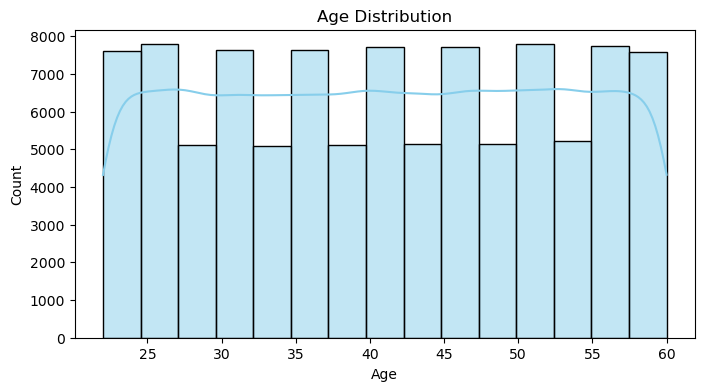

In [17]:
# Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(data=data,x='Age',bins=15,kde=True,color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Insight: Well balanced age distribution,which means it likely represents a broad and diverse age group

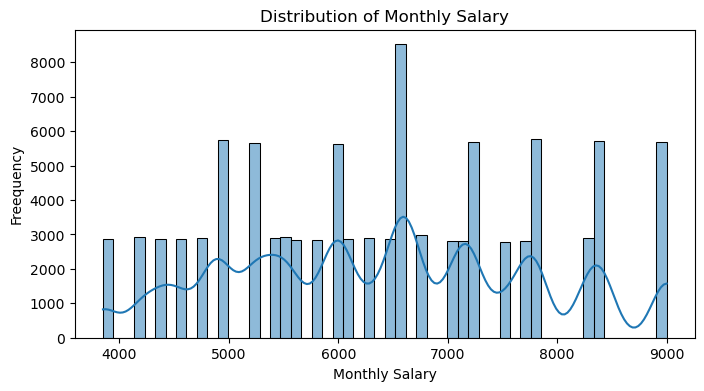

In [18]:
plt.figure(figsize=(8,4))
sns.histplot(data,x='Monthly_Salary',kde=True)
plt.xlabel('Monthly Salary')
plt.ylabel('Freequency')
plt.title("Distribution of Monthly Salary")
plt.show()

Insights:The Monthly salary distribution is broad and multimodal with most freequent salary around 6600
        Over all salary distribution is balanced

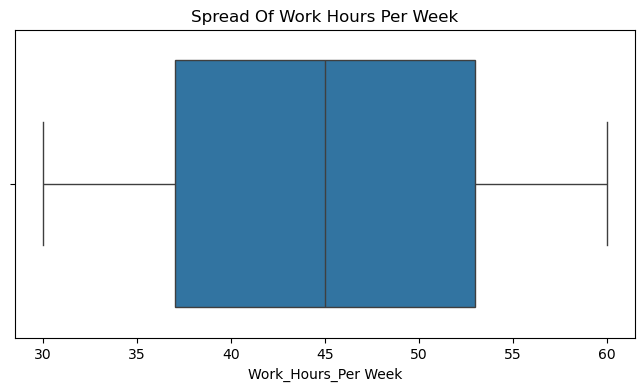

In [19]:
plt.figure(figsize=(8,4))
sns.boxplot(data,x='Work_Hours_Per_Week')
plt.xlabel('Work_Hours_Per Week')
plt.title("Spread Of Work Hours Per Week")
plt.show()

Insight:There Is no Outlier in working Hours Per week
        Average Working Hour per week is 45 Hours

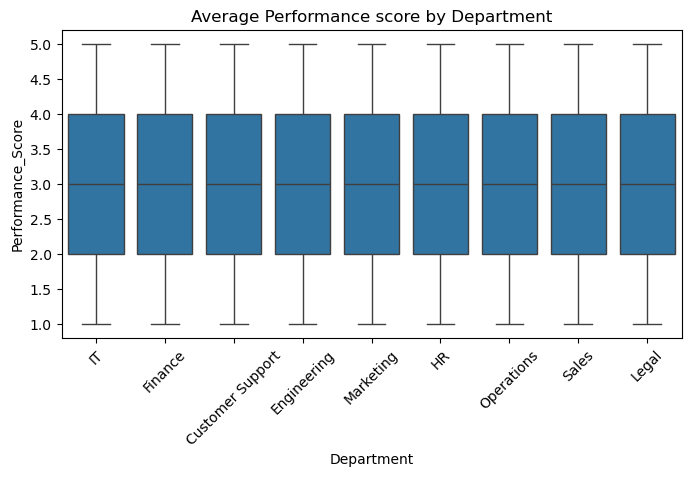

In [20]:
# Average Performance score by Department
#mean_performance=pd.DataFrame(data.groupby('Department')['Performance_Score'].mean())
#sns.barplot(x="Department",y='Performance_Score',data=mean_performance)
plt.figure(figsize=(8,4))
sns.boxplot(x="Department",y='Performance_Score',data=data)
plt.title('Average Performance score by Department')
plt.xticks(rotation=45)
plt.show()

Insight : The average Performance is around 3 for all department
          No Department significantly outperforms or underperforms
          All department have scores ranging from 1.0 to 5.0

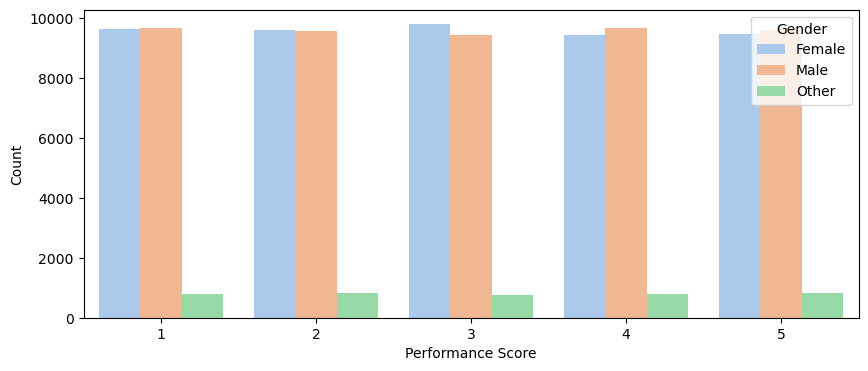

In [21]:
plt.figure(figsize=(10,4))
sns.countplot(x='Performance_Score',data=data,palette='pastel',hue='Gender')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.show()

Insight:In each performance score category the number of males and females are approximately equal 

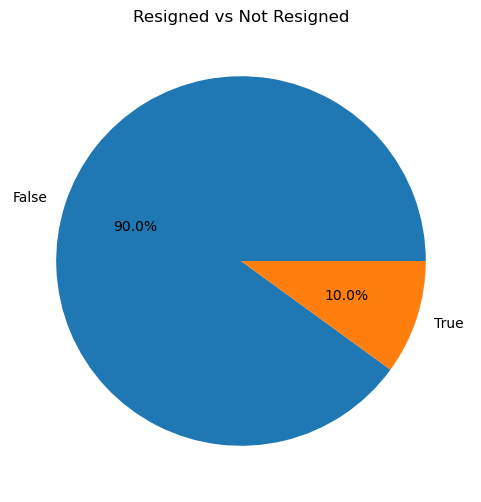

In [22]:
Resignation_count=data['Resigned'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(Resignation_count,labels=Resignation_count.index,autopct="%1.1f%%")
plt.title("Resigned vs Not Resigned")
plt.show()

Insight:90% of employees are not resigned only 10% is resigned 

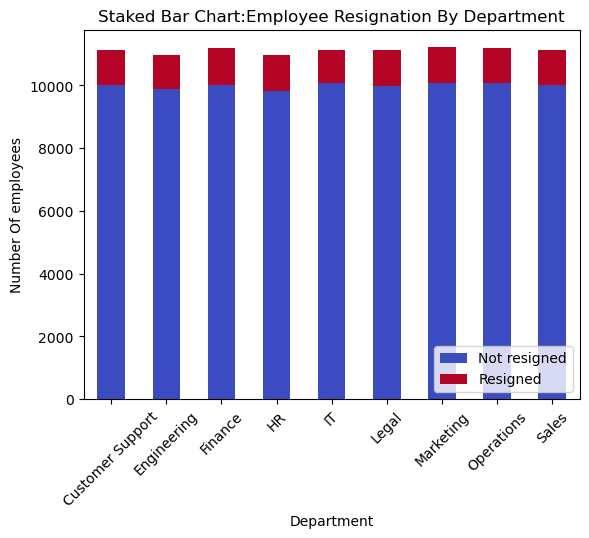

In [23]:
data1=data.groupby(["Department",'Resigned']).size().unstack()
data1.plot(kind="bar",stacked=True,colormap='coolwarm')
plt.xlabel('Department')
plt.ylabel("Number Of employees")
plt.title("Staked Bar Chart:Employee Resignation By Department")
plt.legend(labels=['Not resigned','Resigned'],loc="lower right")
plt.xticks(rotation=45)
plt.show()

Insight:Resignation rate are not extreme in any department
        Finance,HR,CustomerSupport have slightly high turnover
        Engineering,IT departments seem to have better retention comparatively

In [24]:
data.groupby("Department")["Monthly_Salary"].median()

Department
Customer Support    6500.0
Engineering         6500.0
Finance             6500.0
HR                  6500.0
IT                  6500.0
Legal               6500.0
Marketing           6500.0
Operations          6500.0
Sales               6500.0
Name: Monthly_Salary, dtype: float64

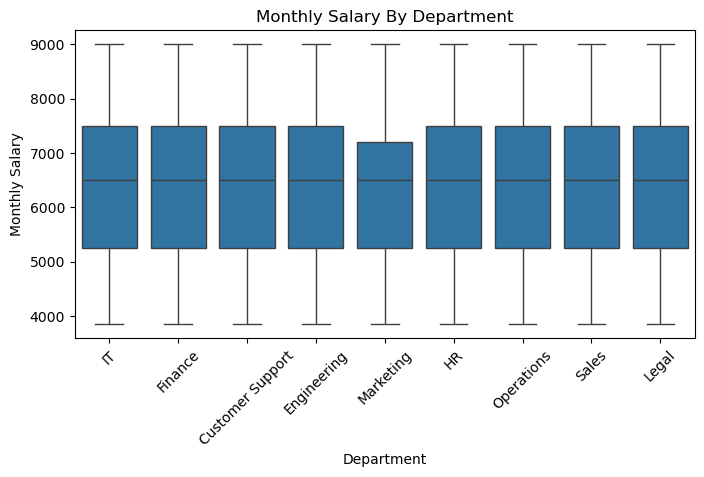

In [25]:
plt.figure(figsize=(8,4))
sns.boxplot(data=data,x='Department',y='Monthly_Salary')
plt.title('Monthly Salary By Department')
plt.xlabel("Department")
plt.ylabel("Monthly Salary")
plt.xticks(rotation=45)
plt.show()

Insight: Overall salary Range is similar across department
        Average salary is consistentfalls around 6300 to 6500 for all department
        No Specific department has a pay advantage 

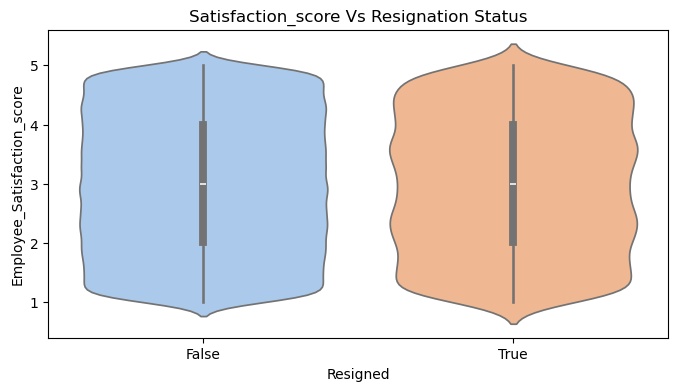

In [26]:
plt.figure(figsize=(8,4))
sns.violinplot(x='Resigned',y='Employee_Satisfaction_Score',data=data,palette='pastel')
plt.title("Satisfaction_score Vs Resignation Status")
plt.xlabel("Resigned")
plt.ylabel("Employee_Satisfaction_score")
plt.show()

Insight:Employees with low satisfaction scores are significantly more likely to resign

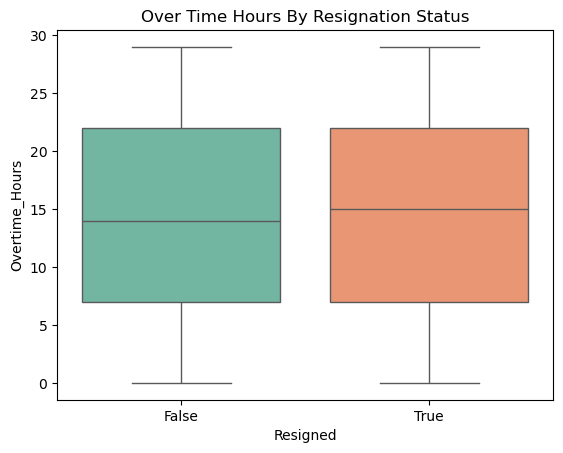

In [27]:
# OverTime Hours Vs Resignation Status
sns.boxplot(x='Resigned',y='Overtime_Hours',data=data,palette='Set2')
plt.title('Over Time Hours By Resignation Status')
plt.show()

Insight:Both groups(Resigne/Not Resigned ) have a similar range of overtime hours with average in between 13-15 hours
        Resigned employees tend to be towards higher overtime ranges
        Long working hours might contribute to resignation

In [28]:
data.select_dtypes(exclude=['number']).columns

Index(['Department', 'Gender', 'Job_Title', 'Education_Level', 'Resigned'], dtype='object')

In [29]:
data["Resigned"]=data['Resigned'].astype(int)

In [30]:
#Encoding
df_en=['Department','Gender','Job_Title','Education_Level']
for i in df_en:
    le=LabelEncoder()
    data[i]=le.fit_transform(data[i])
    


In [31]:
data.head()

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,4,1,55,5,2,1,5,6750.0,33,32,22,2,0,14,66,0,2.63,0
1,2,1,29,2,0,1,5,7500.0,34,34,13,14,100,12,61,2,1.72,0
2,2,1,55,5,8,1,3,5850.0,37,27,6,3,50,10,1,0,3.17,0
3,0,0,48,0,7,0,2,4800.0,52,10,28,12,100,10,0,1,1.86,0
4,1,0,36,0,3,0,2,4800.0,38,11,29,13,100,15,9,1,1.25,0


# DATA MODELING

In [32]:
X=data.drop('Resigned',axis=1)
y=data[["Resigned"]]

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_sm,y_train_sm=smote.fit_resample(X_train,y_train)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=42,n_jobs=-1)
rf.fit(X_train_sm,y_train_sm)
y_pred_rf=rf.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
print("Classification Report")
print(classification_report(y_test,y_pred_rf))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_rf))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.84      0.87     18029
           1       0.10      0.17      0.13      1971

    accuracy                           0.77     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.82      0.77      0.79     20000

Confusion Matrix
[[15088  2941]
 [ 1642   329]]


In [37]:
from xgboost import XGBClassifier
xgb =XGBClassifier(random_state=42)
xgb.fit(X_train_sm, y_train_sm)
y_pred_xgb=xgb.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
print("Classification Report")
print(classification_report(y_test,y_pred_xgb))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_xgb))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.78      0.84     18029
           1       0.10      0.23      0.14      1971

    accuracy                           0.72     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.82      0.72      0.77     20000

Confusion Matrix
[[14013  4016]
 [ 1521   450]]
